# 3. Adding polynomial features

In [5]:
import pandas as pd

# Load the data
data_df = pd.read_csv("c3_electric-cars.csv")

# Print shape
print("Shape:", data_df.shape)

Shape: (57, 2)


In [6]:
# First five rows
data_df.head()

,Temperature [°F],Energy Consumption [Wh/mil]
0,-15,460
1,-12,398
2,-8,460
3,-7,540
4,-6,347


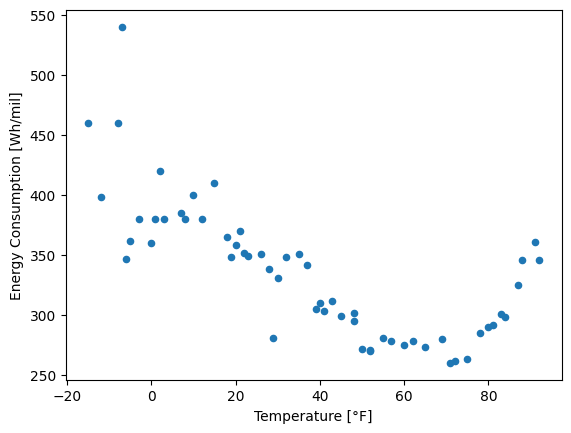

In [7]:
# Extract x, y data
x = data_df.iloc[:, 0].values  # Temperatures
y = data_df.iloc[:, 1].values  # Consumption

# Plot data
%matplotlib inline
import matplotlib.pyplot as plt

data_df.plot.scatter("Temperature [°F]", "Energy Consumption [Wh/mil]")
plt.show()

__Create the polynomial features__

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
import numpy as np

# Create the object
pf_obj = PolynomialFeatures(degree=2)

# Create the polynomial features
X2 = pf_obj.fit_transform(
    # Pass two dimensional array
    x[:, np.newaxis]  # (57,) -> (57,1)
)

print("Shape:", X2.shape)

Shape: (57, 3)


In [10]:
# Fit the preprocessor
pf_obj.fit(x[:, np.newaxis])

# Create the polynomial features
X2 = pf_obj.transform((x[:, np.newaxis]))

In [11]:
# Get feature names
feature_names = pf_obj.get_feature_names_out()

print("Features:", feature_names)

Features: ['1' 'x0' 'x0^2']


In [12]:
# Create the object
pf_obj = PolynomialFeatures(degree=2, include_bias=False)

# Create the polynomial features
X2 = pf_obj.fit_transform(x[:, np.newaxis])

# Get feature names
feature_names = pf_obj.get_feature_names_out()

print("Features:", feature_names)

Features: ['x0' 'x0^2']


In [13]:
# Create the polynomial features manually
X2 = np.c_[x, x ** 2]

__Fit a linear regression__

In [14]:
from sklearn.linear_model import LinearRegression

# Create linear regression
linreg = LinearRegression()

# Fit it
linreg.fit(X2, y)

LinearRegression()

In [15]:
# Generate a hundred values between min(x) and max(x)
x_values = np.linspace(min(x), max(x), num=100)
X_values2 = pf_obj.transform(x_values[:, np.newaxis])

In [16]:
X_values2 = np.c_[x_values, x_values ** 2]

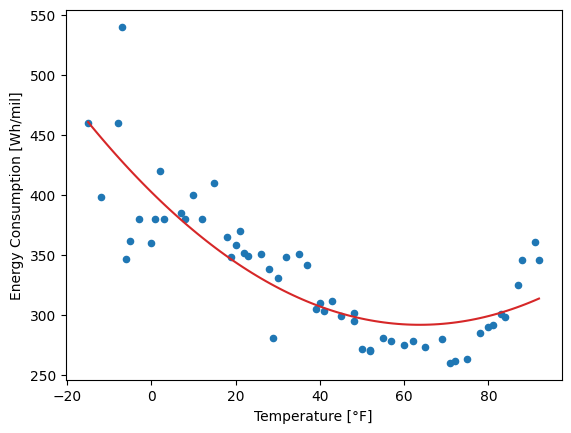

In [17]:
# Compute predictions
y_values = linreg.predict(X_values2)

# Plot predictions
data_df.plot.scatter("Temperature [°F]", "Energy Consumption [Wh/mil]")
plt.plot(x_values, y_values, color="C3")
plt.show()

# 5. Splitting data

In [18]:
import pandas as pd

# Load the data
data_df = pd.read_csv("c3_electric-cars.csv")

In [19]:
import numpy as np

# Generate a list of indexes
n = len(data_df)
indexes = np.arange(n)

print("indexes:", indexes)

indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56]


In [20]:
# Split into train/test indexes
split_idx = int(n * 0.7)
train_idx = indexes[:split_idx]
test_idx = indexes[split_idx:]

print("train indexes:", train_idx)
print("test indexes:", test_idx)

train indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
test indexes: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56]


In [21]:
# Extract x, y data
x = data_df.iloc[:, 0].values  # Temperatures
y = data_df.iloc[:, 1].values  # Consumption

# Split data
x_tr, y_tr = x[train_idx], y[train_idx]
x_te, y_te = x[test_idx], y[test_idx]

print("train:", x_tr.shape, y_tr.shape)
print("test:", x_te.shape, y_te.shape)

train: (39,) (39,)
test: (18,) (18,)


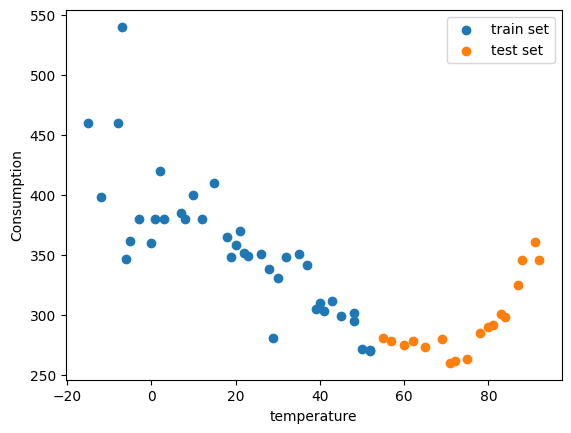

In [22]:

%matplotlib inline
import matplotlib.pyplot as plt

# Plot data points
plt.scatter(x_tr, y_tr, label="train set")
plt.scatter(x_te, y_te, label="test set")
plt.xlabel("temperature")
plt.ylabel("Consumption")
plt.legend()
plt.show()

__Suffling the indexes__

In [23]:
# shuffle the indexes
np.random.shuffle(indexes)

print("indexes:", indexes)  # result depends on the seed

indexes: [54 52 36 41 15 39  0 27 25 28 24 42  8  2 48 50 38 11 47 26 49 44 32 35
 40 22 31  4 55 51 23 53 12  9 18  7 33 14 13 30 29 45  1 46 56 19 21 20
 17 16 34 37 43  5 10  6  3]


In [24]:
# Create the indexes
indexes = np.arange(n)

# Shuffle the indexes
np.random.seed(0)
np.random.shuffle(indexes)

print("indexes:", indexes)

indexes: [35 34 41 27 11  2 33 56 22 55  4 10 29 50 32 40 37  7 14 31 28 46 51 18
 54 26 15  5 30 16 48 20 49  8 13 25 17 42 45 38  1 12 43 24  6 23 36 21
 19  9 39 52  3  0 53 47 44]


In [25]:
# Split into train/test indexes
split_idx = int(n * 0.7)
train_idx = indexes[:split_idx]
test_idx = indexes[split_idx:]

# Split data
x_tr, y_tr = x[train_idx], y[train_idx]
x_te, y_te = x[test_idx], y[test_idx]

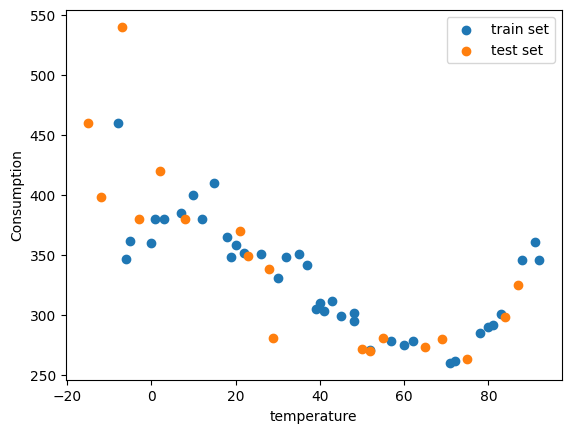

In [27]:
# Plot data points
plt.scatter(x_tr, y_tr, label="train set")
plt.scatter(x_te, y_te, label="test set")
plt.xlabel("temperature")
plt.ylabel("Consumption")
plt.legend()
plt.show()

__With Scikit-learn__

In [28]:
from sklearn.model_selection import train_test_split

# Split data
x_tr, x_te, y_tr, y_te = train_test_split(
    x, y, train_size=0.7, test_size=0.3, random_state=0
)

# Model Selection

In [29]:
from sklearn.metrics import mean_squared_error as mse

# Polynomial regressions of degree 5 and 10
coef5 = np.polyfit(x_tr, y_tr, deg=5)
coef10 = np.polyfit(x_tr, y_tr, deg=10)

# Evaluate performance
y_pred5_tr = np.polyval(coef5, x_tr)
y_pred5_te = np.polyval(coef5, x_te)

print(
    "Degree 5 MSE: {:.0f} (train) vs {:.0f} (test)".format(
        mse(y_tr, y_pred5_tr), mse(y_te, y_pred5_te)
    )
)
# Degree 5 MSE: 719 (train) vs 651 (test)

y_pred10_tr = np.polyval(coef10, x_tr)
y_pred10_te = np.polyval(coef10, x_te)

print(
    "Degree 10 MSE: {:.0f} (train) vs {:.0f} (test)".format(
        mse(y_tr, y_pred10_tr), mse(y_te, y_pred10_te)
    )
)

Degree 5 MSE: 719 (train) vs 651 (test)
Degree 10 MSE: 707 (train) vs 1218 (test)


# 6. One-hot encoding

__Categorical variables__

In [31]:
import pandas as pd

# Load the data
data_df = pd.read_csv("c3_bike-small.csv")

# First five rows
data_df.head()

,temp,weekday,casual
0,0.344,6,331
1,0.363,0,131
2,0.196,1,120
3,0.200,2,108
4,0.227,3,82


The weekday variable is categorical and associates each day of the week with a numerical value between 0 and 6. 
In this example, Monday corresponds to zero and Sunday to six, but this numerical encoding is somewhat arbitrary. In fact, with this encoding, the weekday variable doesn’t indicate the day of the week but how far we are from the beginning of the week.

In [32]:
data_df.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64

In [33]:
# Create X/y data
X = data_df[["temp"]].values
y = data_df.casual.values

# Fit a linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.29525001840042764

In [34]:
# Create X/y data
X = data_df[["temp", "weekday"]].values
y = data_df.casual.values

# Fit a linear regression
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.2988588081409286

We can see that the two R2 coefficients are very close and that the weekday variable isn’t really useful in its current format. However, there is a more appropriate way to encode this variable: one-hot encoding.

__One-hot enconding__

In [35]:
pd.get_dummies(data_df, columns=["weekday"]).head()

,temp,casual,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.344,331,False,False,False,False,False,False,True
1,0.363,131,True,False,False,False,False,False,False
2,0.196,120,False,True,False,False,False,False,False
3,0.200,108,False,False,True,False,False,False,False
4,0.227,82,False,False,False,True,False,False,False


In [36]:
# One-hot encoding
encoded_df = pd.get_dummies(data_df, columns=["weekday"])

# Create X/y data
X = encoded_df.drop(["casual"], axis=1).values
y = encoded_df.casual.values

# Fit a linear regression
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.5969174988134782

# 7. Exercise - Bike sharing polynomial features

Exercise - Load and split the data, set the baseline
---

> **Exercise**: Load the dataset. Encode categorical variables with one-hot encoding. Split the data into train/test sets with the `train_test_split()` function from Scikit-learn (50-50 split, `random_state=0`). Fit a linear regression and compare its performance to the median baseline using the mean absolute error (MAE) measure.

In [54]:
import pandas as pd

# Load the data
data_df = pd.read_csv("c3_bike-sharing-data.csv")
#data_df.drop(['hum', 'windspeed', 'yr', 'workingday', 'holiday'], axis=1, inplace=True)

# First five rows
data_df.head()

,temp,hum,windspeed,yr,workingday,holiday,weekday,season,weathersit,casual
0,0.344,0.806,0.160,2011,no,no,6,spring,cloudy,331
1,0.363,0.696,0.249,2011,no,no,0,spring,cloudy,131
2,0.196,0.437,0.248,2011,yes,no,1,spring,clear,120
3,0.200,0.590,0.160,2011,yes,no,2,spring,clear,108
4,0.227,0.437,0.187,2011,yes,no,3,spring,clear,82


In [55]:
# One-hot encoding
encoded_df = pd.get_dummies(
    data_df, columns=["yr", "workingday", "holiday", "weekday", "season", "weathersit"]
)
encoded_df.head()

,temp,hum,windspeed,casual,yr_2011,yr_2012,workingday_no,workingday_yes,holiday_no,holiday_yes,...,weekday_4,weekday_5,weekday_6,season_fall,season_spring,season_summer,season_winter,weathersit_clear,weathersit_cloudy,weathersit_rainy
0,0.344,0.806,0.160,331,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,True,False
1,0.363,0.696,0.249,131,True,False,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2,0.196,0.437,0.248,120,True,False,False,True,True,False,...,False,False,False,False,True,False,False,True,False,False
3,0.200,0.590,0.160,108,True,False,False,True,True,False,...,False,False,False,False,True,False,False,True,False,False
4,0.227,0.437,0.187,82,True,False,False,True,True,False,...,False,False,False,False,True,False,False,True,False,False


In [57]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
train_df, test_df = train_test_split(
    encoded_df, train_size=0.5, test_size=0.5, random_state=0
)

print("Train DataFrame:", train_df.shape)
print("Test DataFrame:", test_df.shape)

Train DataFrame: (365, 24)
Test DataFrame: (366, 24)


In [58]:
# Create X/y variables
X_tr = train_df.drop("casual", axis=1).values
y_tr = train_df.casual.values

X_te = test_df.drop("casual", axis=1).values
y_te = test_df.casual.values

In [59]:
import numpy as np

# Mean absolute error (MAE)
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [60]:
from sklearn.linear_model import LinearRegression, Ridge

# Function to fit the model
def fit_model(X_train, y_train, X_test):
    # Create the model
    # Note: Using ridge with a small alpha to avoid ill-conditioning issues
    model = Ridge(alpha=1e-4)  # or LinearRegression()

    # Fit it to train data
    model.fit(X_train, y_train)

    # Compute predictions for test set
    y_pred = np.maximum(model.predict(X_test), 50)  # set a lower limit

    return y_pred

In [61]:
# Median baseline
mae_baseline = MAE(y_te, np.median(y_tr))

# Linear regression
y_pred = fit_model(X_tr, y_tr, X_te)
mae_lr = MAE(y_te, y_pred)

print("MAE baseline: {:.3f}".format(mae_baseline))
print("MAE linear regression: {:.3f}".format(mae_lr))

MAE baseline: 503.574
MAE linear regression: 246.866


Exercise - Add polynomial features
---

> **Exercise**: Add the `temp^2` and `temp^3` polynomial features. Then fit and evaluate a linear regression. Plot your model with a scatter plot of temperatures vs. number of users. Feel free to add other features.

In [62]:
# Function to add features
def create_features(df):
    temp = df.temp.values
    others = df.drop(["temp", "casual"], axis=1).values
    return np.c_[temp, temp ** 2, temp ** 3, others]

In [63]:
# Create new input matrices
X_tr2 = create_features(train_df)
X_te2 = create_features(test_df)

# Fit a linear regression
y_pred_lr = fit_model(X_tr2, y_tr, X_te2)
mae_lr2 = MAE(y_te, y_pred_lr)
print("MAE lr with new features: {:.3f}".format(mae_lr2))

MAE lr with new features: 224.400


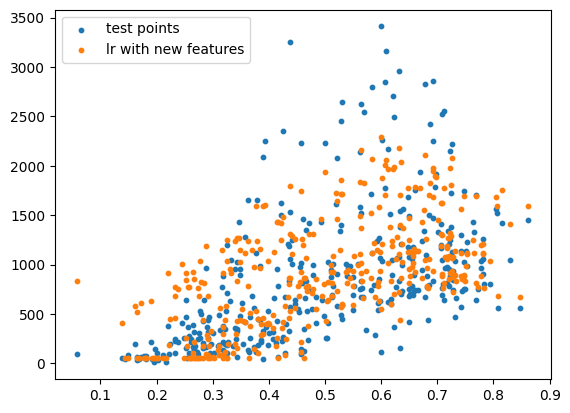

In [64]:
# Plot predictions
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(test_df.temp, test_df.casual, s=10, label="test points")
plt.scatter(test_df.temp, y_pred_lr, s=10, label="lr with new features")
plt.legend()
plt.show()

Exercise - Separate sources
---

In the last exercise, we saw that we can identify two sources in the data.

1. Data points collected during working days
1. Data points collected during non-working days

The goal of this exercise is to create a model for each source using your extended set of features, e.g., the original features plus the `temp^2`, `temp^3` polynomial features.

> **Exercise**: Create a model for each source with the extended set of features, and evaluate the overall performance on the test set using MAE. Plot the two models with a scatter plot of temperatures vs. number of users. Create a final comparison using a bar chart.

In [65]:
# Split data into working days (wd) and non-working days (nwd)
train_df_wd = train_df[train_df.workingday_yes == 1]
train_df_nwd = train_df[train_df.workingday_yes == 0]

test_df_wd = test_df[test_df.workingday_yes == 1]
test_df_nwd = test_df[test_df.workingday_yes == 0]

In [66]:
# Fit two linear regressions
y_pred_wd = fit_model(
    create_features(train_df_wd), train_df_wd.casual, create_features(test_df_wd)
)
y_pred_nwd = fit_model(
    create_features(train_df_nwd), train_df_nwd.casual, create_features(test_df_nwd)
)

# Reassemble predictions
y_pred_wdnwd = np.concatenate([y_pred_wd, y_pred_nwd])
y_te_wdnwd = np.concatenate([test_df_wd.casual, test_df_nwd.casual])

# Compute MAE
mae_wdnwd = MAE(y_te_wdnwd, y_pred_wdnwd)
print("MAE two sources: {:.3f}".format(mae_wdnwd))

MAE two sources: 178.718


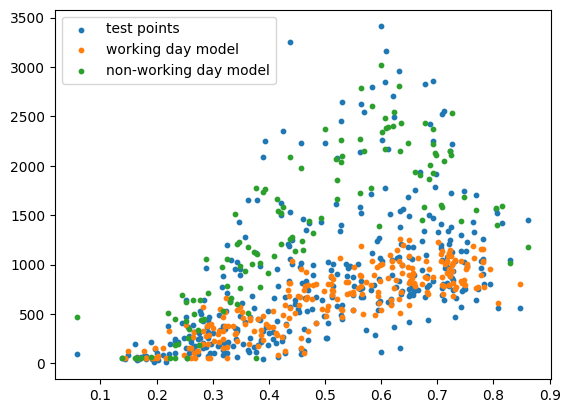

In [67]:
# Plot predictions
temp_te_wdnwd = np.concatenate([test_df_wd.temp, test_df_nwd.temp])
plt.scatter(temp_te_wdnwd, y_te_wdnwd, s=10, label="test points")
plt.scatter(test_df_wd.temp, y_pred_wd, s=10, label="working day model")
plt.scatter(test_df_nwd.temp, y_pred_nwd, s=10, label="non-working day model")

plt.legend()
plt.show()

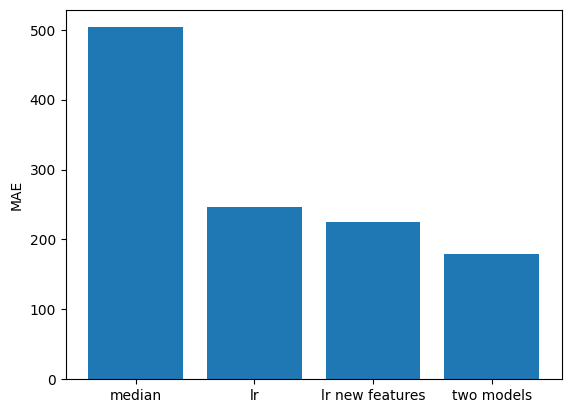

In [68]:
# Final comparison
mae_values = [mae_baseline, mae_lr, mae_lr2, mae_wdnwd]
titles = ["median", "lr", "lr new features", "two models"]

plt.bar(titles, mae_values)

plt.ylabel("MAE")
plt.show()